In [3]:
import numpy as np
import json
from glob import glob
from PIL import Image
import torch
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2
import pandas as pd

In [ ]:
with open('/home/hebb/ml/datasets/frei_hand/training_verts.json', 'r') as f:
    j = json.load(f)

In [59]:
img_path = r'\\wsl.localhost\Ubuntu-20.04\home\hebb\ml\datasets\frei_hand\training\rgb'
mask_path = r'\\wsl.localhost\Ubuntu-20.04\home\hebb\ml\datasets\frei_hand\training\mask'

In [60]:
# look up table 생성

img_pathes = list()
label_pathes = list()

for n in range(32560):
    name = ('0'*8+f'{n}')[-8:]
    m_path = f'{mask_path}/{name}.jpg'

    for i in range(4):
        name = ('0'*8+f'{(32560*i+n)}')[-8:]
        i_path = f'{img_path}\{name}.jpg'
        img_pathes.append(i_path)
        label_pathes.append(m_path)
    

In [ ]:
df = pd.DataFrame()
df['imgs'] = img_pathes
df['masks'] = label_pathes
df

In [62]:
df.to_csv('../../project_hand/seg_datas.csv')

In [66]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, df, transform=None):
        self.data = df
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path, mask_path = self.data.iloc[idx]['imgs'], self.data.iloc[idx]['masks']
        
        img = np.array(Image.open(img_path))
        mask = np.array(Image.open(mask_path))

        if self.transform:
            data = self.transform(image=img, mask=mask)

        return img, mask

In [67]:
transform = A.Compose(
    [
        # A.Normalize(),
        A.Resize(240, 240),
        A.RandomCrop(100, 100),
        ToTensorV2()
    ]
)

In [68]:
df = pd.read_csv('../../project_hand/seg_datas.csv')
ds = Dataset(df)
data = ds.__getitem__(1000)

In [74]:
data[1].shape

(224, 224, 3)

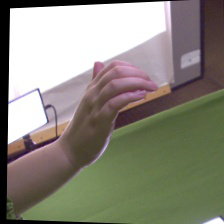

In [75]:
# transpose(1, 2, 0)
Image.fromarray(data[0])

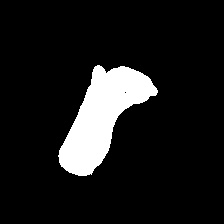

In [76]:
Image.fromarray(data[1])

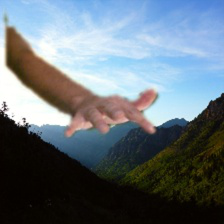

In [58]:
import pathlib
Image.open(r'\\wsl.localhost\Ubuntu-20.04\home\hebb\ml\datasets\frei_hand\training\rgb\00033439.jpg')